In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import copy

In [2]:
def graphik(x,y,res_new):
    %matplotlib notebook
    from matplotlib import pylab as plt
    from matplotlib import rcParams
    import pylab as plt
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm

    rcParams['figure.dpi']=130
    fig=plt.figure(figsize = (6,4))
    axes=Axes3D(fig)

    axes.set_xlabel('Y', fontsize = 12)
    axes.set_ylabel('X', fontsize = 12)
    axes.set_zlabel('U(x,y)', fontsize = 12)

    #surf=axes.plot_surface(x,y,U_xy,cmap=cm.Spectral, rstride=1, cstride=1)
    #surf=axes.plot_surface(x,y,U_xy,cmap=cm.Wistia, rstride=1, cstride=1)
    
    surf=axes.plot_surface(x,y,res_new,cmap=cm.magma, rstride=1, cstride=1)
    #surf=axes.plot_surface(x,y,res_new.transpose(),cmap=cm.magma, rstride=1, cstride=1)
    
    #axes.view_unit(30,30)
    fig.colorbar(surf)
    plt.show()

    '''plt.plot(x,U_xy[8])
    plt.show()'''

In [3]:
def progonka(A_matr, B_matr):
    #n = int(input())
    n=len(B_matr)#заменить на размерность системы len(B_matr)
    
    mass2 = []
    Xi=[0 for i in range(n)]
    PQ=[]

    for i in range(len(A_matr)):
        mass2.append(list(np.append(A_matr[i],B_matr[i])))
        #print(mass2[i])
        
    #mass2 =[[-11, 9, 0, 0, 0, -158],[0, -8, -6, 0, 0, 66],[0, 6, 15, -2, 0, -45],[0, 0, 4, 6, -1, 24],[0, 0, 0, -7, -10, -1]]
    indx1=0
    for i in range(n):#first 'go'
      #print(PQ)
        if i == 0:
            p=(-mass2[0][1])/mass2[0][0]
            q=(mass2[0][n])/mass2[0][0]
            PQ.append([p,q])

        elif 1<=i<n-1:
            p=(-mass2[i][i+1])/(mass2[i][indx1] * PQ[i-1][0] + mass2[i][indx1+1])
            q=(mass2[i][n]-mass2[i][indx1]*PQ[i-1][1])/(mass2[i][indx1] * PQ[i-1][0] + mass2[i][indx1+1]) 
            #PiQi[0]=p
            #PiQi[1]=q
            PQ.append([p,q])

            indx1+=1
        else:#last line
            p=0
            q=(mass2[i][n]-mass2[i][indx1]*PQ[i-1][1])/(mass2[i][indx1] * PQ[i-1][0] + mass2[i][indx1+1]) 
            #PiQi[0]=p
            #PiQi[1]=q
            PQ.append([p,q])
      #print(PQ)
    #print('\n')   
    #print('Pi and Qi:',PQ)

    i=n-1
    while i >= 0:
        if i==n-1:
            Xi[i]=round(PQ[i][1],6)
            i-=1
        else:
            Xi[i]=round(PQ[i][0]*Xi[i+1]+PQ[i][1],6)
            i-=1
    #print('\n')
    #print('Xi:',Xi)
    '''masdiag=[]
    for i in range(n):
        masdiag.append(mass2[i][i])
    #print('diagonal:',masdiag)
    summa=0
    for i in range(n):
        summa+=abs(masdiag[i])'''
    #for i in range(n):
      #print(masdiag[i]/(summa-abs(masdiag[i])))
    '''dl=[]
    for i in range(n):
        if abs(masdiag[i])>= (summa - abs(masdiag[i])):
            dl.append(masdiag[i])
    dl.sort()    
    print(dl)'''
    return Xi


In [4]:
'''
def F_05(U,i1,i2,h1,h2,a=1,tau=1):#add j LAYER
    return 0.5*a*tau/(h2**2) * (U[i1][i2-1]+U[i1][i2+1]) + (1-a*tau/(h2**2))*U[i1][i2]
    
def F_1(U,i1,i2,h1,h2,a=1,tau=1):#add j LAYER
    return 0.5*a*tau/(h1**2) * (U[i1-1][i2]+U[i1+1][i2]) + (1-a*tau/(h1**2))*U[i1][i2]
 '''   
def matr_maker(U,x,y,i11,i22,h1,h2,time,flag='x',tau=1,a=1):
    print(tau)
    N_x=len(x)
    N_y=len(y)
    
    if flag=='x':#пробегаем по иксам 0.5 tau*(j+1/2))
        U_05=np.zeros((N_x-2,N_x-2))
        B_05=np.zeros(N_x-2)
        index=1;print('fix y')
        #for i1 in range(1,N_x-1):
               
        for i1 in range(N_x-2):
            if i1==0:
                U_05[i1][0]=-(1+2*a*tau/(h1**2))
                U_05[i1][1]=a*tau/(h1**2)
                B_05[i1]=-0/2 - U[i1][i22] - math.cos(i22*h2)*math.exp(-2*a*(time+tau*1/2)) #-F_05(U,i1,i22,h1,h2,a=1,tau=tau) - 0.5*a*tau/(h1**2)*math.sinh(i22*h2)*math.exp(-3*a*tau*(j+1/2))#math.exp(-3*a*(0.5*tau+time))
            elif i1==N_x-3:
                U_05[i1][N_x-4]=a*tau/(h1**2)
                U_05[i1][N_x-3]=-(1+2*a*tau/(h1**2))
                B_05[i1]=-0/2 - U[i1][i22] + 1*math.cos(i22*h2)*math.exp(-2*a*(time+tau*1/2))#math.exp(-3*a*(0.5*tau+time))
            else:
                U_05[i1][index-1]=a*tau/(h1**2)
                U_05[i1][index]=-(1+2*a*tau/(h1**2))
                U_05[i1][index+1]=a*tau/(h1**2)
                B_05[i1]=-0/2 - U[i1][i22]
                index+=1

        return [np.round(U_05,6),np.round(B_05,6)]

    else:#пробегаем по игрекам 1.0 tau*(j)
        U_1=np.zeros((N_y-2,N_y-2))
        B_1=np.zeros(N_y-2)
        index=1;print('fix x')

        for i2 in range(N_y-2):
            if i2==0:
                U_1[i2][0]=-(1+2*a*tau/(h2**2))
                U_1[i2][1]=a*tau/(h2**2)
                B_1[i2]=-0/2 - U[i11][i2] - math.cos(i11*h1)*math.exp(-2*a*(time+tau)) #math.exp(-3*a*(tau+time))
            elif i2==N_y-3:
                U_1[i2][N_y-4]=a*tau/(h2**2)
                U_1[i2][N_y-3]=-(1+2*a*tau/(h2**2))
                B_1[i2]=-0/2 - U[i11][i2] + 1*math.cos(i11*h1)*math.exp(-2*a*(time+tau))#math.exp(-3*a*(tau+time))
            else:
                U_1[i2][index-1]=a*tau/(h2**2)
                U_1[i2][index]=-(1+2*a*tau/(h2**2))
                U_1[i2][index+1]=a*tau/(h2**2)
                B_1[i2]=-0/2 - U[i11][i2]
                index+=1

        return [np.round(U_1,6),np.round(B_1,6)]
    

In [6]:
st_X=0;end_X=round(math.pi,6)#;print(end_X)
st_Y=0;end_Y=round(math.pi,6)#;print(end_Y)

N=11
eps=0.01

x,y = np.linspace(st_X,end_X,N),np.linspace(st_Y,end_Y,N)
print('x:',x,'\ny:',y,'\n')
#print(x,math.pi/4)
h_x=x[1]-x[0]
h_y=y[1]-y[0]


U_xy=np.zeros((N,N))
'''заполнение сетки начальными условиями'''
for i1 in range(N):
    for i2 in range(N):  
        U_xy[i1][i2]=round(math.cos(x[i1])*math.cos(2*y[i2]),6)
        #
    print(U_xy[i1])

'''--------------------------------------------------------------------------'''
'''--------------------------------------------------------------------------'''
NNN=5#4
T=0.2#0.15
t=np.linspace(0,T,NNN);print("t layers ",t,'\n')
tau=round(t[1]-t[0],6);print('tau:',tau,'\n')

#j=0
a=1

U_xy_05=U_xy.copy()#np.zeros((N,N))
U_xy_1=U_xy.copy()#np.zeros((N,N))

#print(U_xy_1[-1][9])

collection_list=[]
collection_list.append(np.round(U_xy,6))
for j in range(0,len(t)-1):
    
    #U_xy_05=U_xy_1.copy()
    '''first step'''
    
    for i2 in range(1,len(y)-1):
        tmp=matr_maker(np.round(U_xy_1,6),x,y,i11='x',i22=i2,h1=h_x,h2=h_y,time=t[j],flag='x',tau=tau,a=1)#time=t[j]

        aa=progonka(A_matr=tmp[0], B_matr=tmp[1])
        #print('\n0.5_progon',aa,type(aa),len(aa))
        #print('gauss',np.linalg.solve(tmp[0], tmp[1]))

        for k in range(1,len(x)-1):
            U_xy_05[k][i2]=aa[k-1]
            
        U_xy_05[0][i2]=math.cos(i2*h_y)*math.exp(-2*a*(t[j]+tau*1/2))
        U_xy_05[-1][i2]=-1*math.cos(i2*h_y)*math.exp(-2*a*(t[j]+tau*1/2))#math.exp(-3*a*(0.5*tau+t[j]))
    
    for i in range(len(x)):
        U_xy_05[i][-1]=math.cos(x[i])*math.exp(-2*a*(t[j]+tau*1/2))
    for i in range(len(x)):
        U_xy_05[i][0]=-1*math.cos(x[i])*math.exp(-2*a*(t[j]+tau*1/2))
    '''переопределяем граничные условия после пер-да на j+0.5'''
    
    print('\n=============================\n')
    
    #U_xy_1=U_xy_05.copy()
    '''second step'''
    for i1 in range(1,len(x)-1):
        tmp=matr_maker(np.round(U_xy_05,6),x,y,i11=i1,i22='y',h1=h_x,h2=h_y,time=t[j],flag='y',tau=tau,a=1)#time=t[j]

        aa=progonka(A_matr=tmp[0], B_matr=tmp[1])
        #print('\n1_progon',aa,type(aa),len(aa))
        #print('gauss',np.linalg.solve(tmp[0], tmp[1]))

        for k in range(1,len(y)-1):
            U_xy_1[i1][k]=aa[k-1]#U_xy_1[k+1][i2]=aa[k]
        U_xy_1[i1][0]=math.cos(i1*h_x)*math.exp(-2*a*(t[j]+tau))#math.exp(-3*a*(t[j]+1))
        U_xy_1[i1][-1]=-1*math.cos(i1*h_x)*math.exp(-2*a*(t[j]+tau))#math.exp(-3*a*(t[j]+1))
    
    for i in range(len(y)):
        U_xy_1[0][i]=math.cos(y[i])*math.exp(-2*a*(t[j]+tau))
    for i in range(len(y)):
        U_xy_1[-1][i]=-1*math.cos(y[i])*math.exp(-2*a*(t[j]+tau))#U_xy_05[-2][i2]
    '''переопределяем граничные условия после пер-да на j+1'''
    
    testt=0
    testt=copy.deepcopy(U_xy_1)
    collection_list.append(np.round(testt,6)) 
        
print(len(collection_list))

for i in range(len(collection_list)):
    with open ('table_5_%s.txt'%(i),'w') as outfile:
        for j in range(len(collection_list[i])):
            for k in range(len(collection_list[i][j])):
                outfile.write(str(collection_list[i][j][k])+';')
            outfile.write('\n')



x: [0.        0.3141593 0.6283186 0.9424779 1.2566372 1.5707965 1.8849558
 2.1991151 2.5132744 2.8274337 3.141593 ] 
y: [0.        0.3141593 0.6283186 0.9424779 1.2566372 1.5707965 1.8849558
 2.1991151 2.5132744 2.8274337 3.141593 ] 

[ 1.        0.809017  0.309017 -0.309017 -0.809017 -1.       -0.809017
 -0.309017  0.309018  0.809017  1.      ]
[ 0.951057  0.769421  0.293892 -0.293893 -0.769421 -0.951057 -0.769421
 -0.293892  0.293893  0.769421  0.951057]
[ 0.809017  0.654508  0.25     -0.25     -0.654509 -0.809017 -0.654508
 -0.25      0.25      0.654509  0.809017]
[ 0.587785  0.475528  0.181636 -0.181636 -0.475528 -0.587785 -0.475528
 -0.181635  0.181636  0.475528  0.587785]
[ 0.309017  0.25      0.095491 -0.095492 -0.25     -0.309017 -0.25
 -0.095491  0.095492  0.25      0.309017]
[-0. -0. -0.  0.  0.  0.  0.  0. -0. -0. -0.]
[-0.309017 -0.25     -0.095492  0.095492  0.25      0.309017  0.25
  0.095491 -0.095492 -0.25     -0.309017]
[-0.587785 -0.475528 -0.181636  0.181636  0.47552

In [7]:
'''Создание сеток для 3д графика по х & у'''
xgrid,ygrid=np.meshgrid(x,y)
#ygrid,xgrid=np.meshgrid(y,x)

<IPython.core.display.Javascript object>


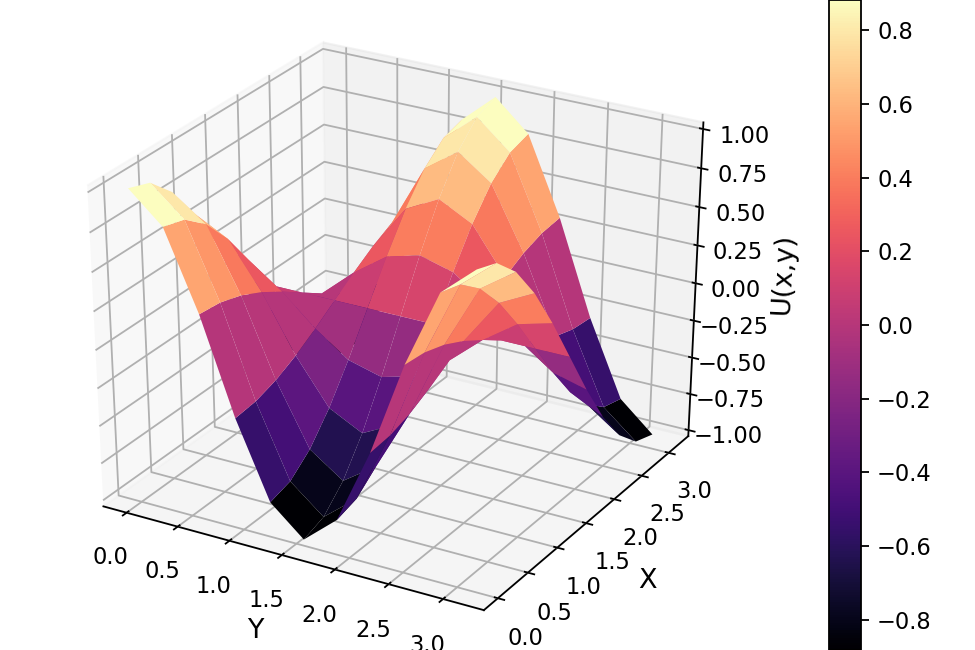

1.0 -1.0


In [8]:
graphik(xgrid,ygrid,collection_list[0])
print(np.amax(collection_list[0]),np.amin(collection_list[0]))

<IPython.core.display.Javascript object>


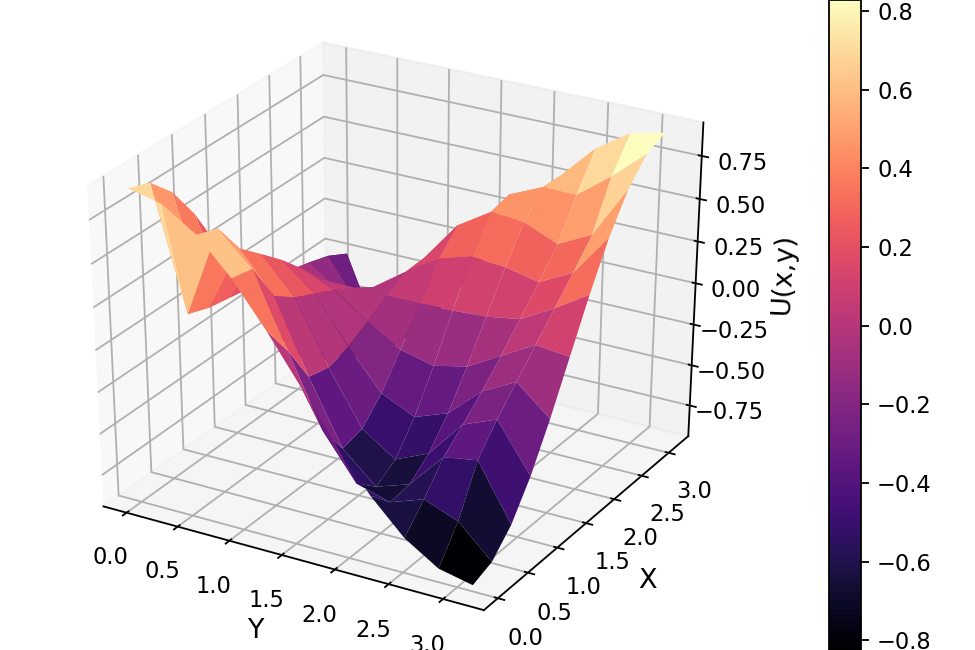

0.904837 -0.904837


In [9]:
graphik(xgrid,ygrid,collection_list[1])
print(np.amax(collection_list[1]),np.amin(collection_list[1]))

<IPython.core.display.Javascript object>


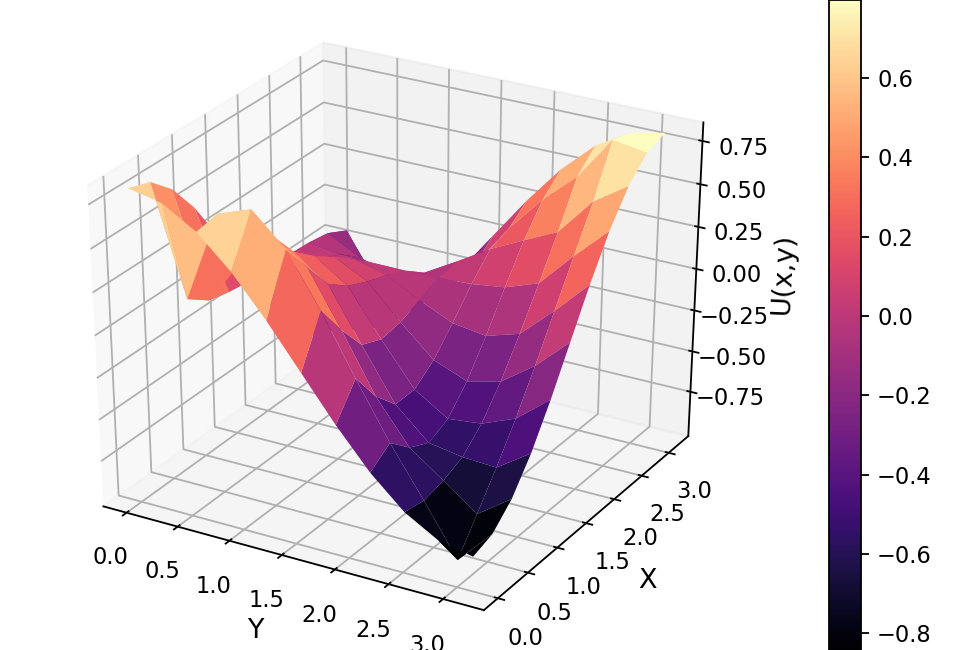

0.818731 -0.990438


In [10]:
graphik(xgrid,ygrid,collection_list[2])
print(np.amax(collection_list[2]),np.amin(collection_list[2]))

<IPython.core.display.Javascript object>


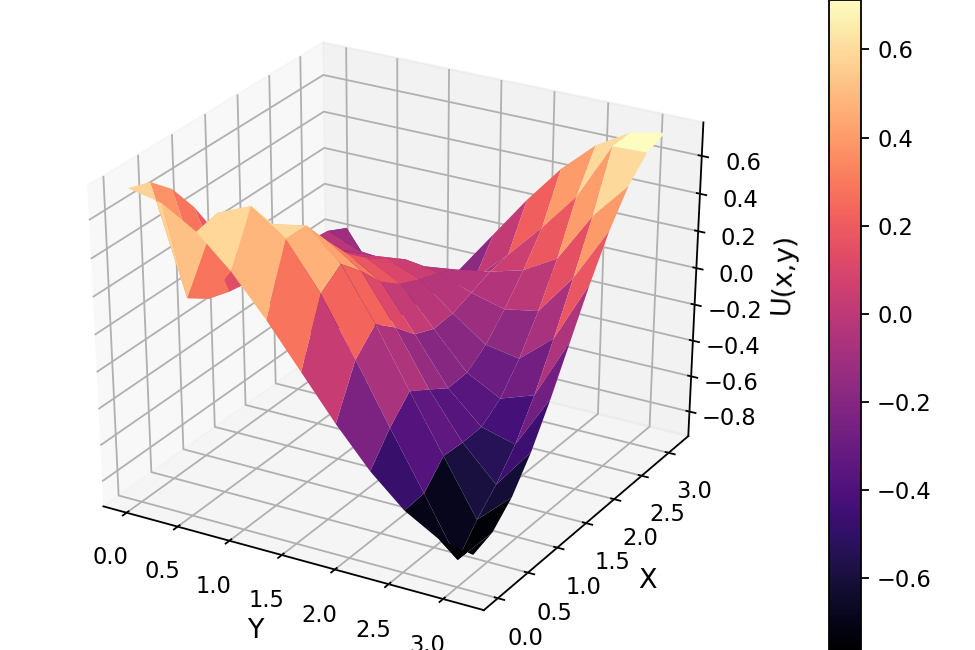

0.740818 -0.906321


In [11]:
graphik(xgrid,ygrid,collection_list[3])
print(np.amax(collection_list[3]),np.amin(collection_list[3]))

<IPython.core.display.Javascript object>


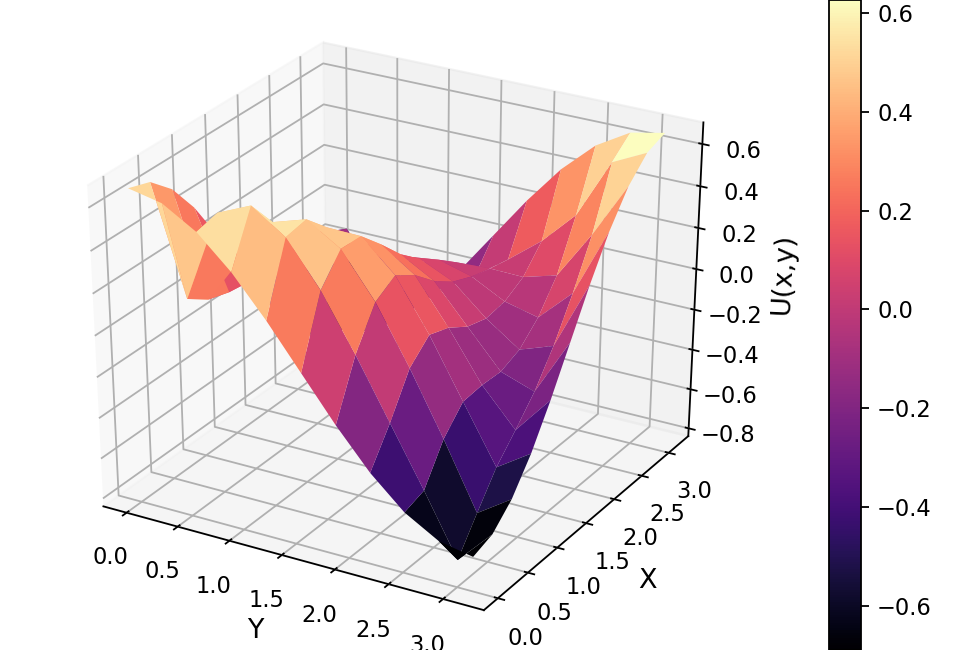

0.67032 -0.809391


In [12]:
graphik(xgrid,ygrid,collection_list[4])
print(np.amax(collection_list[4]),np.amin(collection_list[4]))

<IPython.core.display.Javascript object>


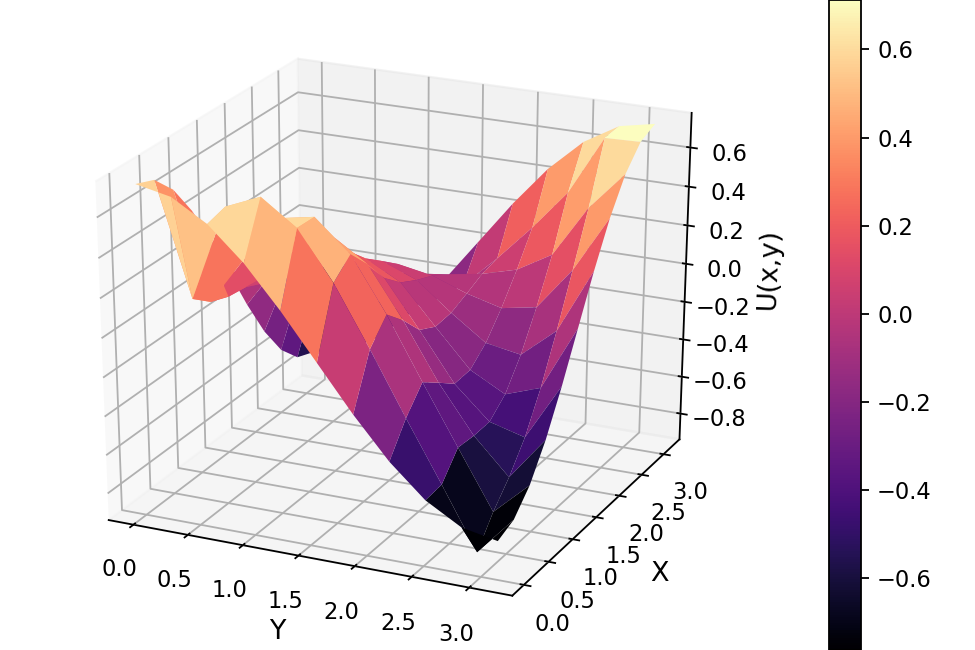

[-7.40818221e-01 -7.04559988e-01 -5.99334500e-01 -4.35441962e-01
 -2.28925322e-01  1.28313496e-07  2.28925566e-01  4.35442170e-01
  5.99334651e-01  7.04560068e-01  7.40818221e-01]
0.7408182206817179
0   0
0.7408182206817179
0.7408182206817179


In [31]:
res=np.where(U_xy_1==np.amax(U_xy_1))
coord=list(zip(res[0],res[1]))
print(coord[0][0],' ',coord[0][1])
print(U_xy_1[coord[0][0]][coord[0][1]])
#print(U_xy_1[coord[0][1]][coord[0][0]])
print(x[10])
print(y[9])


In [1]:
'''for i1 in range(N):
    for i2 in range(N):  
        U_xy[i1][i2]=math.cos(x[i1])*math.cos(2*y[i2])
    
graphik(xgrid,ygrid,U_xy)


print(U_xy[:][-1])

print(np.max(U_xy))

#print(np.unravel_index(U_xy_1.argmax(),U_xy_1.shape()))

res=np.where(U_xy==np.amax(U_xy))
coord=list(zip(res[0],res[1]))
print(coord[0][0],' ',coord[0][1])
print(U_xy[coord[0][0]][coord[0][1]])
print(U_xy[coord[0][1]][coord[0][0]])'''

"for i1 in range(N):\n    for i2 in range(N):  \n        U_xy[i1][i2]=math.cos(x[i1])*math.cos(2*y[i2])\n    \ngraphik(xgrid,ygrid,U_xy)\n\n\nprint(U_xy[:][-1])\n\nprint(np.max(U_xy))\n\n#print(np.unravel_index(U_xy_1.argmax(),U_xy_1.shape()))\n\nres=np.where(U_xy==np.amax(U_xy))\ncoord=list(zip(res[0],res[1]))\nprint(coord[0][0],' ',coord[0][1])\nprint(U_xy[coord[0][0]][coord[0][1]])\nprint(U_xy[coord[0][1]][coord[0][0]])"

# -------------------------------------------------------------------------------

In [35]:
def matr_maker(U,x,y,i11,i22,h1,h2,time,flag='x',tau=1,a=1):
    #sizzze=len(x)-2
    N_x=len(x)
    N_y=len(y)
    
    if flag=='x':#пробегаем по иксам 0.5
        U_05=np.zeros((N_x,N_x))
        B_05=np.zeros(N_x)
        index=2
        #for i1 in range(1,N_x-1):
        
        U_05[0][0]=1
        B_05[0]=math.sinh(i22*h2)*math.exp(-3*a*(0.5*tau+time))
        
        for i1 in range(1,N_x-1):
            if i1==1:
                U_05[i1][1]=-(1+a*tau/(h1**2))
                U_05[i1][2]=0.5*a*tau/(h1**2)
                B_05[i1]=-F_05(U,i1,i22,h1,h2,a=1,tau=tau) - 0.5*a*tau/(h1**2)*math.sinh(i22*h2)*math.exp(-3*a*(0.5*tau+time))
            elif i1==N_x-2:
                U_05[i1][N_x-3]=0.5*a*tau/(h1**2)
                U_05[i1][N_x-2]=-(1+a*tau/(h1**2)-0.5*a*tau/(h1**2))
                B_05[i1]=-F_05(U,i1,i22,h1,h2,a=1,tau=tau) + h1*2*math.sinh(i22*h2)*math.exp(-3*a*(0.5*tau+time))
            else:
                U_05[i1][index-1]=0.5*a*tau/(h1**2)
                U_05[i1][index]=-(1+a*tau/(h1**2))
                U_05[i1][index+1]=0.5*a*tau/(h1**2)
                B_05[i1]=-F_05(U,i1,i22,h1,h2,a=1,tau=tau)
                index+=1

        
        U_05[N_x-1][N_x-2]=-1
        U_05[N_x-1][N_x-1]=1
        B_05[N_x-1]=h1*2*math.sinh(i22*h2)*math.exp(-3*a*(0.5*tau+time))
        #print('b_x',B_05)
        return [U_05,B_05]

    else:#пробегаем по игрекам 1.0
        
        U_1=np.zeros((N_y,N_y))
        B_1=np.zeros(N_y)
        index=2
        #for i1 in range(1,N_x-1):

        for i2 in range(1,N_y-1):
            if i2==1:
                U_1[i2][1]=-(-0.5*a*tau/(h2**2)+1+a*tau/(h2**2))
                U_1[i2][2]=0.5*a*tau/(h2**2)
                B_1[i2]=-F_1(U,i11,i2,h1,h2,a=1,tau=tau) + 0.5*a*tau/(h2**2)*h2*math.cos(2*h1*i11)*math.exp(-3*a*(tau+time))
            elif i2==N_y-2:
                U_1[i2][N_y-3]=0.5*a*tau/(h2**2)
                U_1[i2][N_y-2]=-(1+a*tau/(h2**2)-0.5*a*tau/(h1**2))
                B_1[i2]=-F_1(U,i11,i2,h1,h2,a=1,tau=tau) - 0.5*a*tau/(h2**2)*3/4*math.cos(2*h1*i11)*math.exp(-3*a*(tau+time))
            else:
                U_1[i2][index-1]=0.5*a*tau/(h2**2)
                U_1[i2][index]=-(1+a*tau/(h2**2))
                U_1[i2][index+1]=0.5*a*tau/(h2**2)
                B_1[i2]=-F_1(U,i11,i2,h1,h2,a=1,tau=tau)
                index+=1

        U_1[0][0]=-1
        U_1[0][1]=1
        B_1[0]=h2*math.cos(2*h1*i11)*math.exp(-3*a*(tau+j))
        
        U_1[N_y-1][N_y-1]=1
        B_1[N_y-1]=3/4*math.cos(2*h1*i11)*math.exp(-3*a*(tau+j))
        #print('b_y',B_1)
        return [U_1,B_1]